In [182]:
# importamos librerias y cargamos los datos que contiene el csv 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [183]:
df = pd.read_csv('raw_data\BankChurners.csv')
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [108]:
# Visualizamos la cantidad de filas y columnas en nuestro dataset
df.shape

(10127, 23)

In [184]:
# Eliminamos las columnas que no vamos a utilizar
df = df.iloc[:, 1:-2]

In [185]:
df.shape

(10127, 20)

In [111]:
df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [186]:
# Pasamos todas las columnas a minusculas
df.columns = [col.lower() for col in df.columns]
df.head()

attrition_flag  customer_age gender  dependent_count education_level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  marital_status income_category card_category  months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [113]:
 # Visualiza la cantidad de valores nulos y tipo de dato de nuestras columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  object 
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  
 14  avg_op

In [187]:
# Cantidad de valores nulos
df.isnull().sum()

attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [188]:
# quitar espacios en blancos de STR
str_cols = ['attrition_flag', 'gender' ,'education_level', 'marital_status', 'income_category', 'card_category']
for c in str_cols:
    df[c] = df[c].str.strip() 

In [189]:
# Vemos si hay datos duplicados
df.duplicated().sum()

0

## Analisis Exploratorio

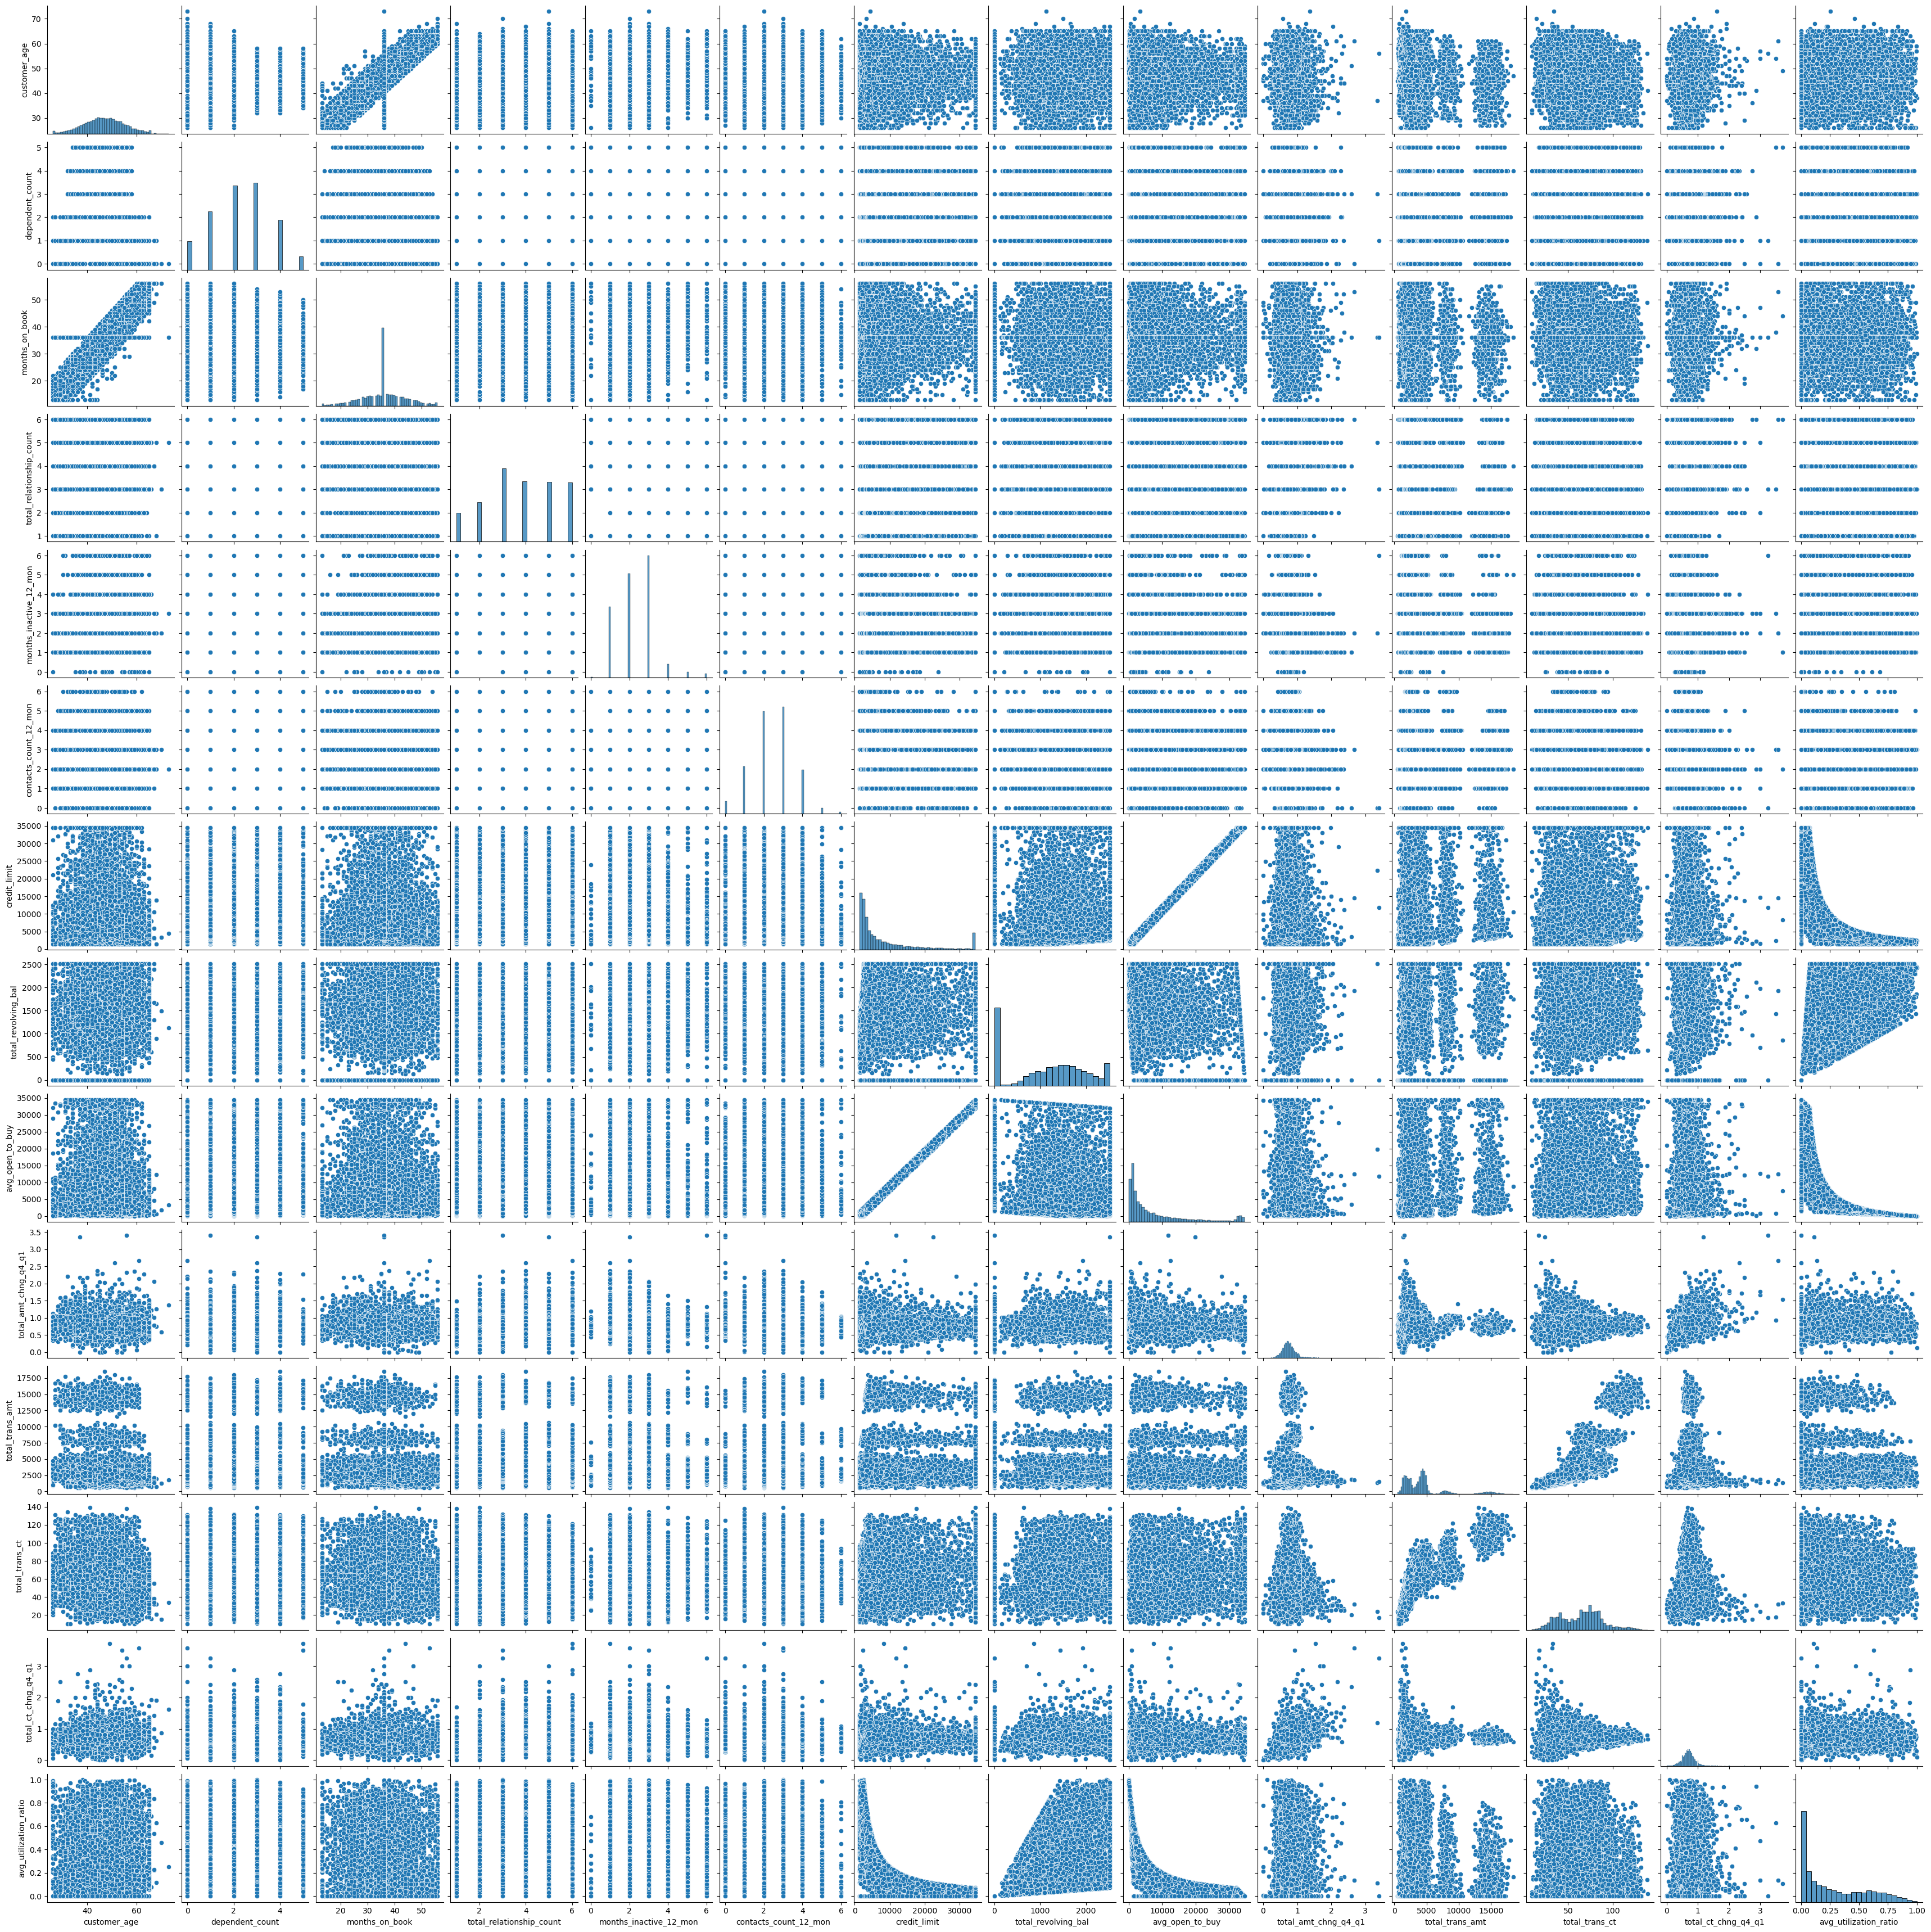

In [16]:
sns.pairplot(df);

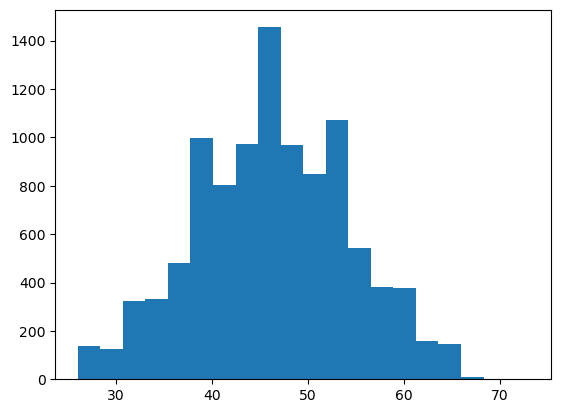

In [232]:
plt.hist(df.customer_age, bins=20); # distribucion de los clientes por EDAD

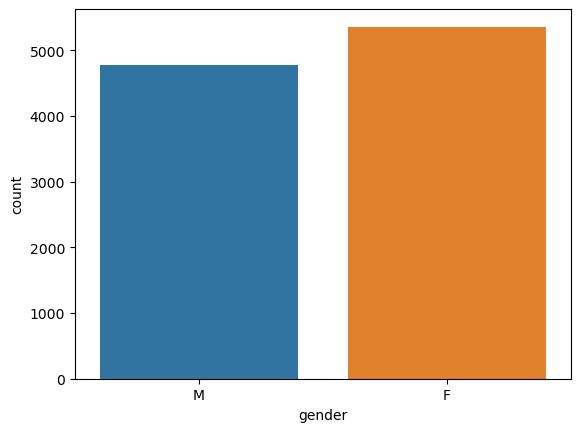

In [40]:
sns.countplot(x='gender', data=df);

In [41]:
df.gender.value_counts(normalize=True)

F    0.529081
M    0.470919
Name: gender, dtype: float64

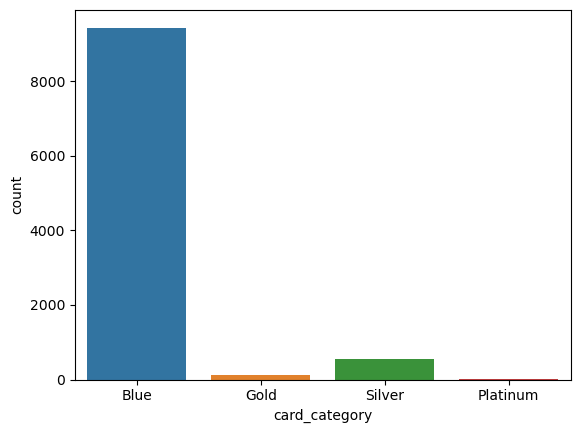

In [14]:
sns.countplot(x='card_category', data=df);

In [15]:
df.card_category.value_counts(normalize=True)

Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: card_category, dtype: float64

In [16]:
df.card_category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: card_category, dtype: int64

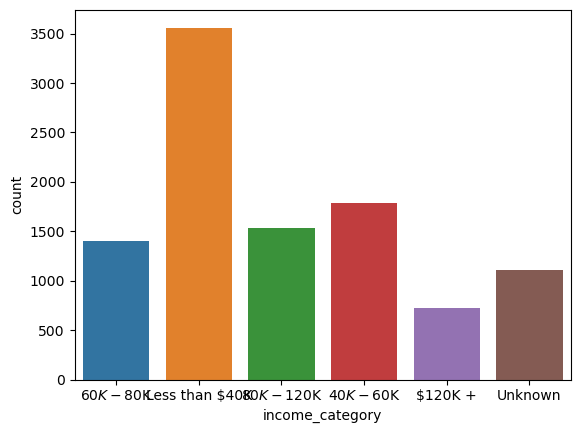

In [17]:
sns.countplot(x='income_category', data=df);

<AxesSubplot:>

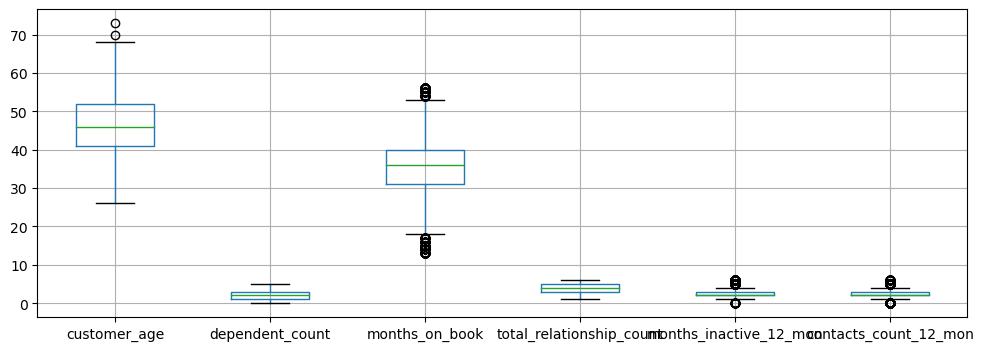

In [18]:
df.boxplot(column=['customer_age', 'dependent_count', 'months_on_book', # Buscando outliers en variables con escala parecida
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon'], figsize=(12,4))

<AxesSubplot:>

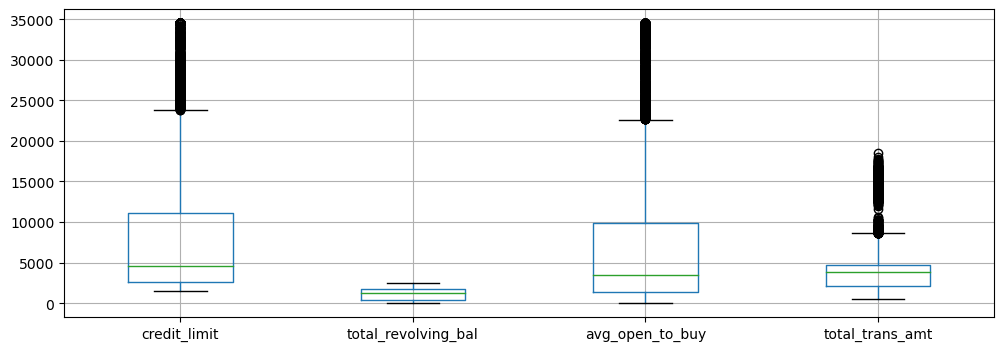

In [19]:
df.boxplot(column=['credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_trans_amt'], figsize=(12,4))

In [ ]:
# Vemos que hay muchos outliers en el credito, pero es totalmente probable

In [190]:
# Tratar variables categoricas
from sklearn.preprocessing import LabelEncoder,StandardScaler

bi = LabelEncoder()
df["attrition_flag"]=bi.fit_transform(df["attrition_flag"])
df["gender"]=bi.fit_transform(df["gender"])



In [191]:
get_dum =pd.get_dummies(df,columns=["education_level","marital_status","income_category","card_category"])
get_dum

attrition_flag  customer_age  gender  dependent_count  months_on_book  \
0                   1            45       1                3              39   
1                   1            49       0                5              44   
2                   1            51       1                3              36   
3                   1            40       0                4              34   
4                   1            40       1                3              21   
...               ...           ...     ...              ...             ...   
10122               1            50       1                2              40   
10123               0            41       1                2              25   
10124               0            44       0                1              36   
10125               0            30       1                2              36   
10126               0            43       0                2              25   

       total_relationship_count  months_inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       contacts_count_12_mon  credit_limit  total_revolving_bal  ...  \
0                          3       12691.0                  777  ...   
1                          2        8256.0                  864  ...   
2                          0        3418.0                    0  ...   
3                          1        3313.0                 2517  ...   
4                          0        4716.0                    0  ...   
...                      ...           ...                  ...  ...   
10122                      3        4003.0                 1851  ...   
10123                      3        4277.0                 2186  ...   
10124                      4        5409.0                    0  ...   
10125                      3        5281.0                    0  ...   
10126                      4       10388.0                 1961  ...   

       income_category_$120K +  income_category_$40K - $60K  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
...                        ...                          ...   
10122                        0                            1   
10123                        0                            1   
10124                        0                            0   
10125                        0                            1   
10126                        0                            0   

       income_category_$60K - $80K  income_category_$80K - $120K  \
0                                1                             0   
1                                0                             0   
2                                0                             1   
3                                0                             0   
4                                1                             0   
...                            ...                           ...   
10122                            0                             0   
10123                            0                             0   
10124                            0                             0   
10125                            0 

In [119]:
df = get_dum

In [121]:
df.head()

attrition_flag  customer_age  gender  dependent_count  months_on_book  \
0               1            45       1                3              39   
1               1            49       0                5              44   
2               1            51       1                3              36   
3               1            40       0                4              34   
4               1            40       1                3              21   

   total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   credit_limit  total_revolving_bal  ...  income_category_$120K +  \
0       12691.0                  777  ...                        0   
1        8256.0                  864  ...                        0   
2        3418.0                    0  ...                        0   
3        3313.0                 2517  ...                        0   
4        4716.0                    0  ...                        0   

   income_category_$40K - $60K  income_category_$60K - $80K  \
0                            0                            1   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            1   

   income_category_$80K - $120K  income_category_Less than $40K  \
0                             0                               0   
1                             0                               1   
2                             1                               0   
3                             0                               1   
4                             0                               0   

   income_category_Unknown  card_category_Blue  card_category_Gold  \
0                        0                   1                   0   
1                        0                   1                   0   
2                        0                   1                   0   
3                        0                   1                   0   
4                        0                   1                   0   

   card_category_Platinum  card_category_Silver  
0                       0                     0  
1                       0                     0  
2                       0                     0  
3                       0                     0  
4                       0                     0  

[5 rows x 37 columns]

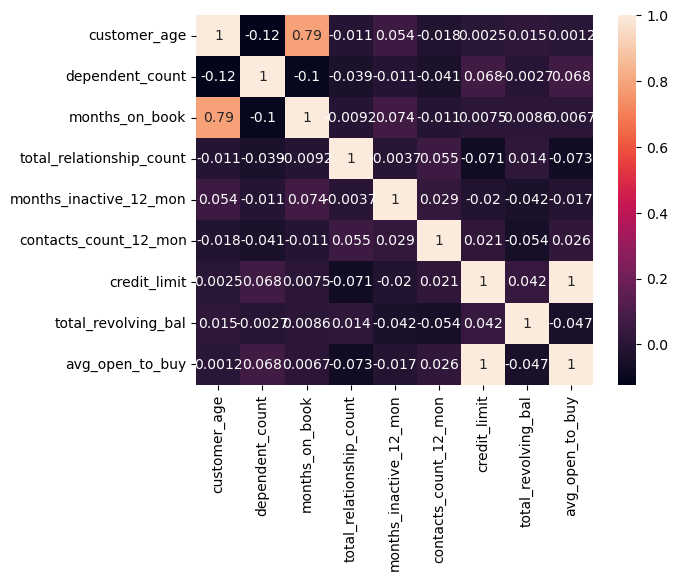

In [43]:
# Ver correlaciones netre las variables numericas.

sns.heatmap(df[["customer_age","dependent_count","months_on_book","total_relationship_count","months_inactive_12_mon","contacts_count_12_mon","credit_limit","total_revolving_bal",'avg_open_to_buy']].corr(), annot=True);

In [93]:
# Guardar datos procesados 
df.to_csv('processed_data.csv', index=False)


### Balanceamos los datos con Undersampling

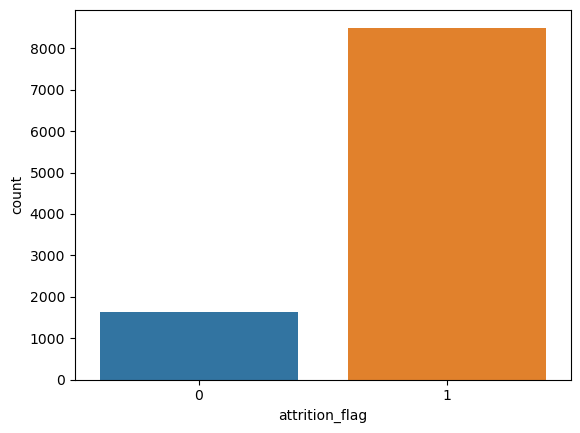

In [159]:
# En esta grafica se aprecia mejor el desbalace de los datos
sns.countplot(x='attrition_flag', data=df);

In [160]:
# Balancear datos Undersampling
mayoritaria = df [df['attrition_flag'] == 1] 
minoritaria = df [df['attrition_flag']==0]


n_muestras = len(minoritaria)
mayoritaria_m = mayoritaria.sample(n_muestras)


In [161]:
df_b = pd.concat([mayoritaria_m, minoritaria])

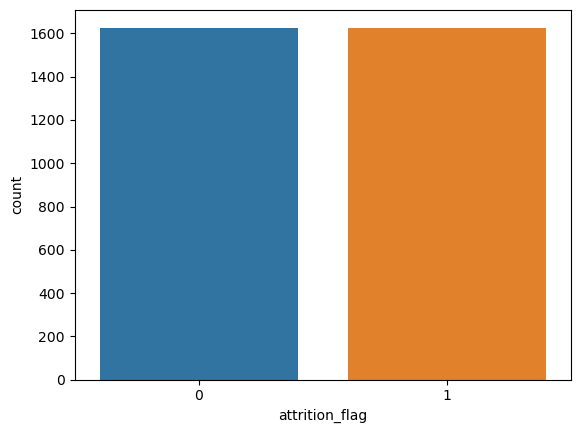

In [162]:
# Ahora vemos que nuestra variable obejtivo esta balanceada
sns.countplot(x=df_b['attrition_flag'], data=df_b);

### Separamos 'X , y' para hacer nuestro train_test

In [163]:
X = df_b.drop('attrition_flag', axis = 1)

y = df_b['attrition_flag']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Estandarizamos las variables ya que estan en escalas distintas

In [165]:
# Estandarizamos los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Probamos modelos 

### Arbol de decision

In [178]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)
accuracy = clf.score(X_test_scaled, y_test)
y_pred = clf.predict(X_test_scaled)
recall = recall_score (y_test, y_pred)
print("Accuracy:", accuracy)
print( 'Recall', recall)

Accuracy: 0.9001536098310292
Recall 0.8972809667673716


In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       320
           1       0.91      0.90      0.90       331

    accuracy                           0.90       651
   macro avg       0.90      0.90      0.90       651
weighted avg       0.90      0.90      0.90       651



In [192]:
importances = clf.feature_importances_
print("Importancia de características:", importances)

Importancia de características: [0.02285063 0.00232836 0.00441785 0.01162774 0.04888118 0.01251454
 0.01940719 0.0137243  0.08397701 0.00353689 0.03588509 0.17987959
 0.46187211 0.06371596 0.00506801 0.00050564 0.00203615 0.00281731
 0.         0.00399974 0.00076836 0.00273194 0.00656993 0.
 0.         0.         0.00076836 0.00138304 0.00122937 0.0060025
 0.         0.         0.         0.         0.00150121 0.        ]


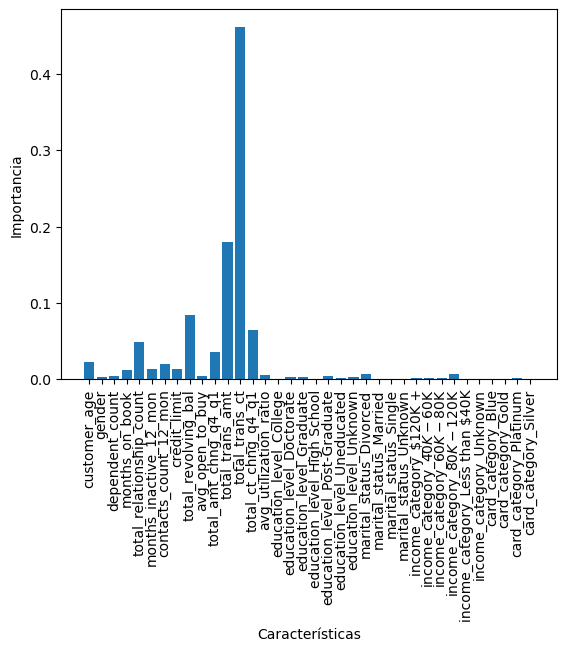

In [194]:
import matplotlib.pyplot as plt

# Visualizar la importancia de las características
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()

### Regresion Logistica

In [195]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train_scaled, y_train)
y_pred = lgr.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print('Precisión: {:.2f}'.format(accuracy))

Precisión: 0.84


In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       320
           1       0.87      0.81      0.84       331

    accuracy                           0.84       651
   macro avg       0.84      0.84      0.84       651
weighted avg       0.85      0.84      0.84       651



### XGBoost Classifier

In [202]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
model = xgb.XGBClassifier(objective='binary:logistic',
                          eval_metric='logloss',
                          learning_rate=0.1,
                          max_depth=6,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          n_estimators=100)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


auc = roc_auc_score(y_test, y_pred)

In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       320
           1       0.97      0.94      0.95       331

    accuracy                           0.95       651
   macro avg       0.95      0.95      0.95       651
weighted avg       0.95      0.95      0.95       651



### AdaBoost Classifier

In [207]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train_scaled, y_train)
ada_pred = ada.predict(X_test_scaled)

In [208]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       320
           1       0.96      0.91      0.93       331

    accuracy                           0.93       651
   macro avg       0.93      0.93      0.93       651
weighted avg       0.93      0.93      0.93       651



### Modelo ANN Red Neuronal

In [219]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score

model = keras.models.Sequential()
model.add(keras.layers.Dense(units=10, activation='relu', input_dim=X_train.shape[1]))
model.add(keras.layers.Dense(units=10, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train_scaled, y_train, batch_size=32, epochs=100)


y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5)



Epoch 1/100
82/82 [==============================] - 1s 1ms/step - loss: 0.6855 - accuracy: 0.5832
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6052 - accuracy: 0.7023
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.7557
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.7895
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8037
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.3936 - accuracy: 0.8198
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.8340
Epoch 8/100
82/82 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8402
Epoch 9/100
82/82 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8490
Epoch 10/100
82/82 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8532
Epoch 11/

82/82 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.9466
Epoch 84/100
82/82 [==============================] - 0s 1ms/step - loss: 0.1343 - accuracy: 0.9458
Epoch 85/100
82/82 [==============================] - 0s 1ms/step - loss: 0.1344 - accuracy: 0.9435
Epoch 86/100
82/82 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.9481
Epoch 87/100
82/82 [==============================] - 0s 1ms/step - loss: 0.1346 - accuracy: 0.9447
Epoch 88/100
82/82 [==============================] - 0s 1ms/step - loss: 0.1330 - accuracy: 0.9481
Epoch 89/100
82/82 [==============================] - 0s 1ms/step - loss: 0.1301 - accuracy: 0.9493
Epoch 90/100
82/82 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.9512
Epoch 91/100
82/82 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.9501
Epoch 92/100
82/82 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.9516
Epoch 93/100


In [220]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       320
           1       0.89      0.85      0.87       331

    accuracy                           0.87       651
   macro avg       0.87      0.87      0.87       651
weighted avg       0.87      0.87      0.87       651



## Ahora mejorar el mejor modelo

EL XGBoost Classifier fue de todos el que mejor resultado nos aporto, ahora intentaremos mejorarlo con un Gridsearch

In [223]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
model = xgb.XGBClassifier(objective='binary:logistic',
                          eval_metric='logloss',
                          learning_rate=0.1,
                          max_depth=6,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          n_estimators=100)


params = {
    'objective': ['binary:logistic'], 
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 150, 200, 250],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

scoring = {'accuracy': make_scorer(accuracy_score), 'roc_auc': make_scorer(roc_auc_score)}



grid_search = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=5, refit='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.0

In [225]:
print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', grid_search.best_score_)

Mejores hiperparámetros: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.6}
Mejor puntuación de validación cruzada: 0.9596626310349918


In [226]:
y_pred = grid_search.predict(X_test_scaled)

##### En comparacion con el modelo sin GridSearch, no hay una mejora significativa

In [227]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       320
           1       0.96      0.95      0.95       331

    accuracy                           0.95       651
   macro avg       0.95      0.95      0.95       651
weighted avg       0.95      0.95      0.95       651



### Veamos la importancia de variables

In [232]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
model = xgb.XGBClassifier(objective='binary:logistic',
                          eval_metric='logloss',
                          learning_rate=0.1,
                          max_depth=6,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          n_estimators=100)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


auc = roc_auc_score(y_test, y_pred)

In [233]:
importances = model.feature_importances_
print("Importancia de características:", importances)

Importancia de características: [0.03252035 0.0381427  0.01701283 0.01395369 0.06709334 0.02770967
 0.0285857  0.02364529 0.0980112  0.01805731 0.03651131 0.10100386
 0.13488223 0.06368618 0.0236449  0.00782708 0.00470817 0.00590092
 0.01195878 0.01777522 0.01132067 0.01291098 0.03551589 0.02264704
 0.01050341 0.00652777 0.02240766 0.01555972 0.01112247 0.02432094
 0.0076648  0.01558907 0.00994181 0.00396359 0.         0.01737348]


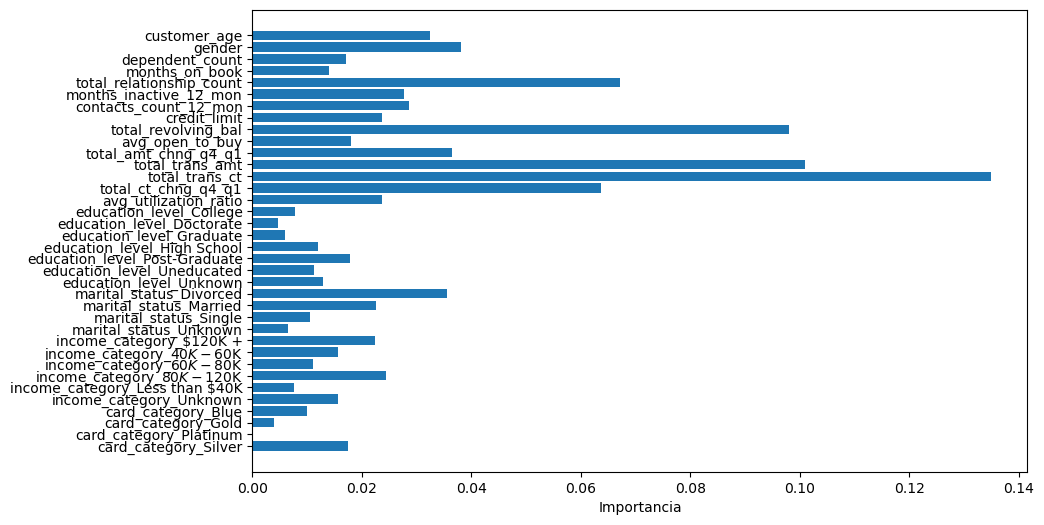

In [234]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))

# Visualizar la importancia de las características
ax.barh(range(len(importances)), importances)
ax.set_yticks(range(len(importances)))
ax.set_yticklabels(X.columns)
ax.set_xlabel("Importancia")
ax.invert_yaxis() 
plt.show()

#### Parece que las variables que implican el uso de las tarjetas tienen mayor importancia que las variables demograficas

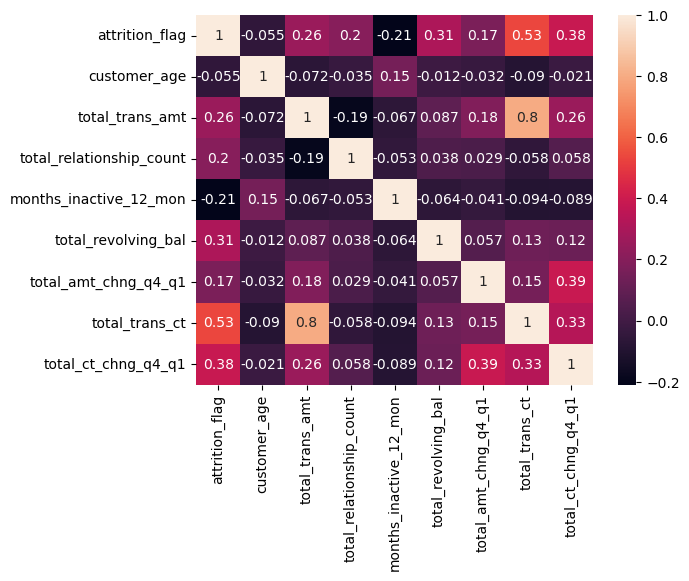

In [279]:
# Ahora veremos 
sns.heatmap(df_b[['attrition_flag','customer_age','total_trans_amt', 'total_relationship_count','months_inactive_12_mon',
'total_revolving_bal','total_amt_chng_q4_q1',
'total_trans_ct', 'total_ct_chng_q4_q1']].corr(), annot=True);

#### Ahora entrenemos el XGBoost con menos variables pero las mas importantes

In [235]:
X = df_b.drop('attrition_flag', axis = 1)
X = df_b[['customer_age','total_trans_amt', 'total_relationship_count','months_inactive_12_mon',
'total_revolving_bal','total_amt_chng_q4_q1',
'total_trans_ct', 'total_ct_chng_q4_q1']]

y = df_b['attrition_flag']

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [238]:
# Estandarizamos los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [241]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
model = xgb.XGBClassifier(objective='binary:logistic',
                          eval_metric='logloss',
                          learning_rate=0.1,
                          max_depth=6,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          n_estimators=100)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)



In [242]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       309
           1       0.96      0.94      0.95       342

    accuracy                           0.95       651
   macro avg       0.95      0.95      0.95       651
weighted avg       0.95      0.95      0.95       651



#### Utilizando solo 8 variables de las mas importantes tiene igual rendimiento, pero redece la carga computacional

## Curva ROC de XGBoost

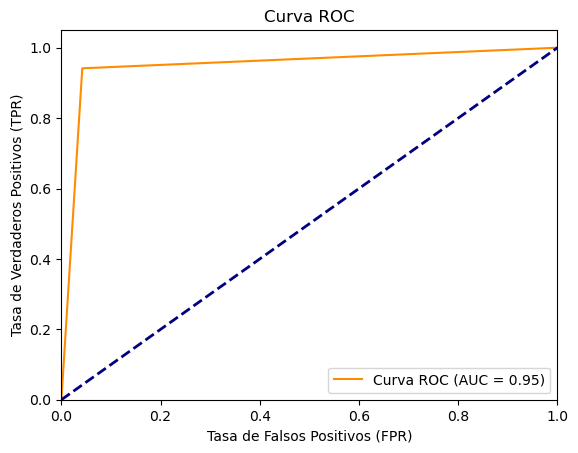

In [243]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, umbrales = roc_curve(y_test, y_pred)

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Guardar modelo para su posterior uso (ultimo paso)

In [244]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import pickle

# Definir el preprocesador con las transformaciones necesarias
preprocesador = ColumnTransformer([
    ('label_encoder', LabelEncoder(), ['attrition_flag', 'gender']),
    ('one_hot_encoder', OneHotEncoder(), ['education_level', 'marital_status', 'income_category', 'card_category']),
    ('standard_scaler', StandardScaler(), ['age', 'dependent_count', 'months_on_book', 'total_relationship_count'])
])


# Definir el pipeline que incluye el preprocesador y el modelo
pipeline = Pipeline([
    ('preprocesador', preprocesador),
    ('model', model)
])


# Guardar el pipeline en un archivo pickle
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)


# Resumen de resultados